In [32]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [33]:
data = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [34]:
category_cols = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education','Income']

binary_cols = ['Diabetes_binary','HighBP', 'HighChol', 'CholCheck',  'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost','DiffWalk', 'Sex']
stats_cols = ['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']
cat_all = category_cols.copy()

<AxesSubplot:>

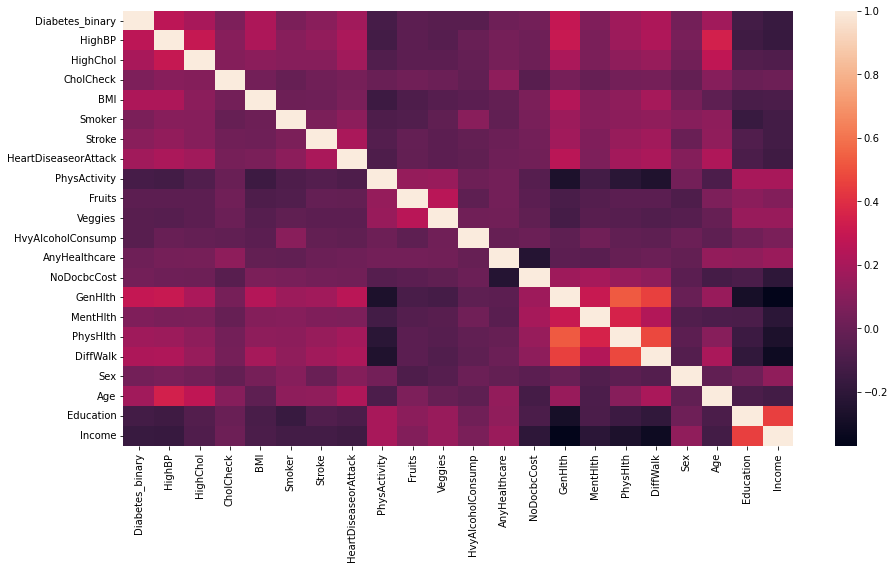

In [60]:
variables = pd.DataFrame(data.iloc[:,:])
plt.figure(figsize=(15,8))
sns.heatmap(variables.corr())

<AxesSubplot:>

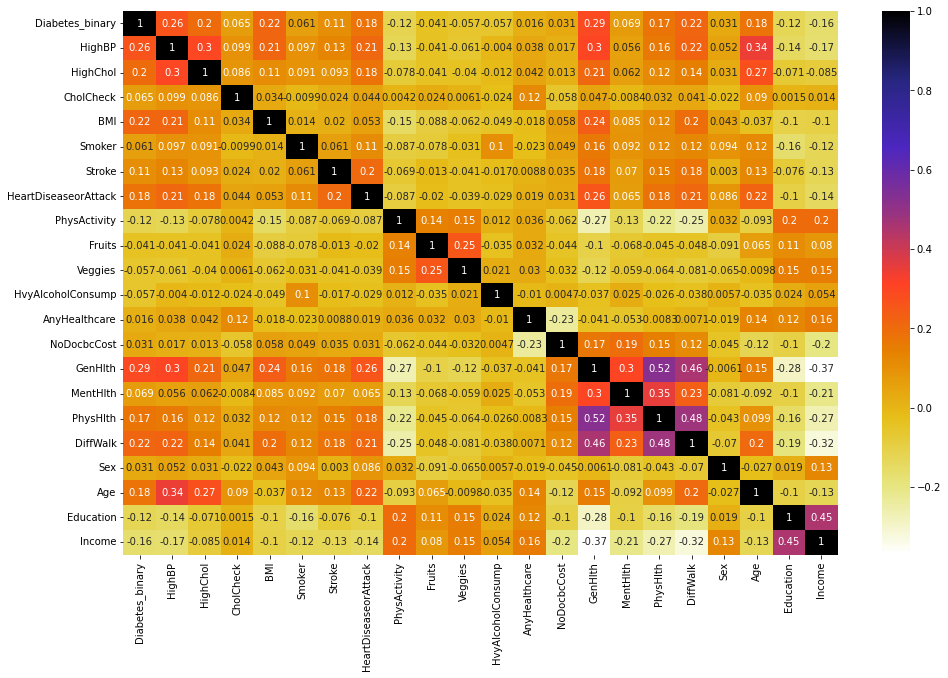

In [35]:
variables = pd.DataFrame(data.iloc[:,:])
plt.figure(figsize=(16,10))
sns.heatmap(variables.corr(),annot = True,cmap = plt.cm.CMRmap_r)

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_filtered = data[binary_cols + stats_cols]
df_normalized = pd.DataFrame(scaler.fit_transform(df_filtered[stats_cols]), columns=stats_cols)
df_combined = pd.concat([data[binary_cols], df_normalized], axis=1)

mean_diabetes = df_combined[df_combined['Diabetes_binary'] == 1].mean()[1:]
mean_nondiabetes = df_combined[df_combined['Diabetes_binary'] == 0].mean()[1:]

trace1 = go.Scatterpolar(
    r=mean_diabetes,
    theta=mean_diabetes.index,
    fill='toself',
    name='Diabetes'
)

trace2 = go.Scatterpolar(
    r=mean_nondiabetes,
    theta=mean_nondiabetes.index,
    fill='toself',
    name='Non-Diabetes'
)

layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

According to the radar plot, people with diabetes:
   - had stroke
   - smoke more often
   - have higher level of cholestrol
   - have higher blood pressure
   - have lower income
   - have lower education level
   - are older
   - have higher BMI
   - have difficulty to walk
   - have lower level of GenHlth, MentHlth, and PhysHlth

In [37]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

array([[<AxesSubplot:title={'center':'Diabetes_binary'}>,
        <AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'GenHlth'}>],
       [<AxesSubplot:title={'center':'MentHlth'}>,
        <AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
       

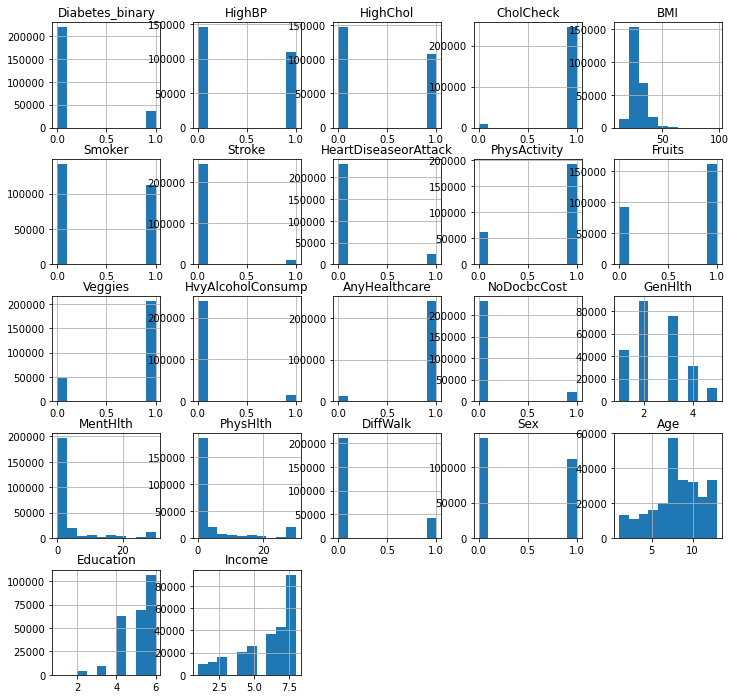

In [38]:
data.hist(figsize = (12,12))

In [39]:
data["diabetes_binary"]= data["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

<AxesSubplot:xlabel='diabetes_binary', ylabel='count'>

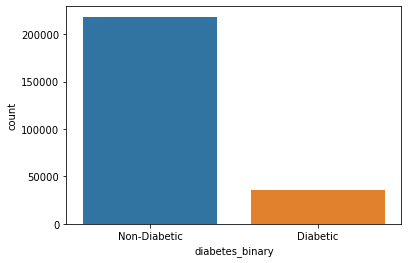

In [40]:
##Target Variable
sns.countplot(x = 'diabetes_binary', data = data)

[Text(0.5, 1.0, 'Sex vs. Diabetic/non-diabetic')]

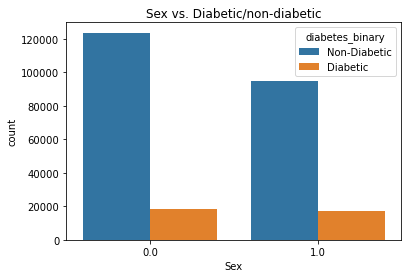

In [41]:
sns.countplot(x = 'Sex', hue = 'diabetes_binary', data = data).set(title = 'Sex vs. Diabetic/non-diabetic')

<AxesSubplot:xlabel='Income', ylabel='count'>

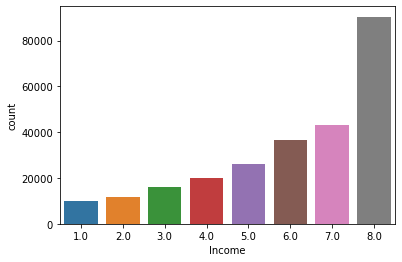

In [42]:
sns.countplot(x = 'Income', data = data)

[Text(0.5, 1.0, 'Income vs. Diabetic/non-diabetic')]

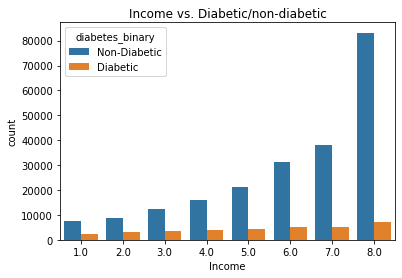

In [43]:
sns.countplot(x = 'Income', hue = 'diabetes_binary', data = data).set(title = 'Income vs. Diabetic/non-diabetic')

<AxesSubplot:xlabel='Age', ylabel='count'>

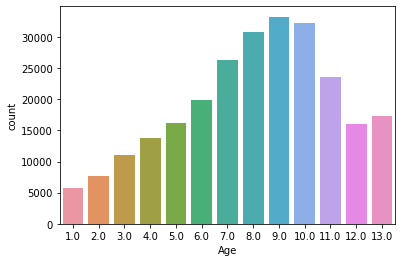

In [44]:
sns.countplot(x = 'Age', data = data)

[Text(0.5, 1.0, 'Age vs. Diabetic/non-diabetic')]

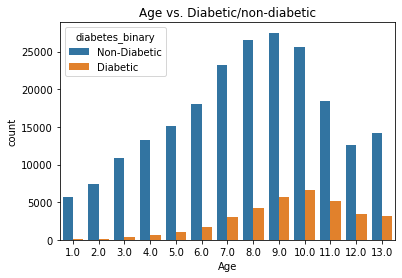

In [45]:
sns.countplot(x = 'Age', hue = 'diabetes_binary', data = data).set(title = 'Age vs. Diabetic/non-diabetic')

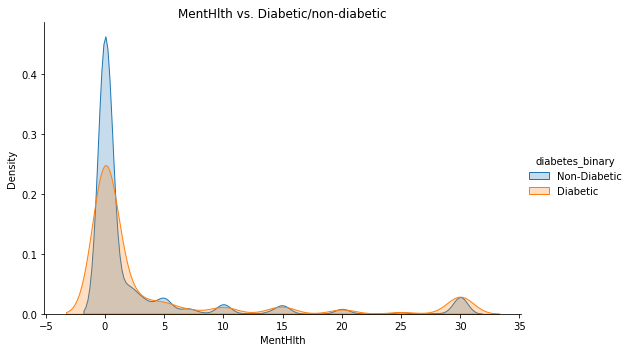

In [46]:
g = sns.FacetGrid(data[data['MentHlth'].notnull()], hue='diabetes_binary', height=5, aspect=1.5).set(title = 'MentHlth vs. Diabetic/non-diabetic')
g.map(sns.kdeplot, 'MentHlth', shade=True)
g.add_legend()

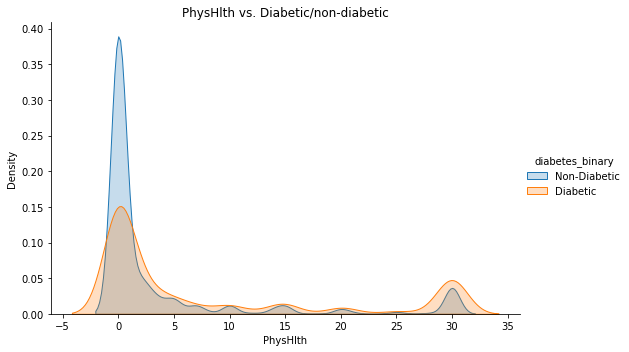

In [47]:
g = sns.FacetGrid(data[data['PhysHlth'].notnull()], hue='diabetes_binary', height=5, aspect=1.5).set(title = 'PhysHlth vs. Diabetic/non-diabetic')
g.map(sns.kdeplot, 'PhysHlth', shade=True)
g.add_legend()

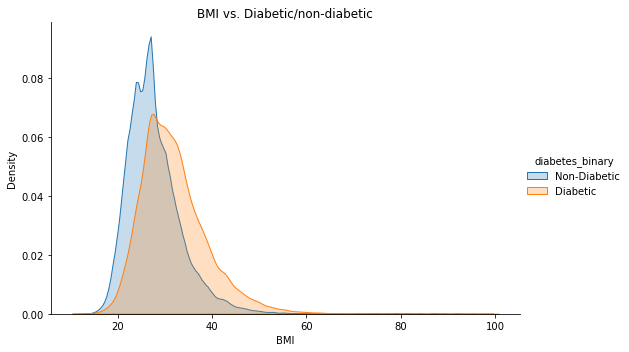

In [48]:
g = sns.FacetGrid(data[data['BMI'].notnull()], hue='diabetes_binary', height=5, aspect=1.5).set(title = 'BMI vs. Diabetic/non-diabetic')
g.map(sns.kdeplot, 'BMI', shade=True)
g.add_legend()

<AxesSubplot:xlabel='Education', ylabel='count'>

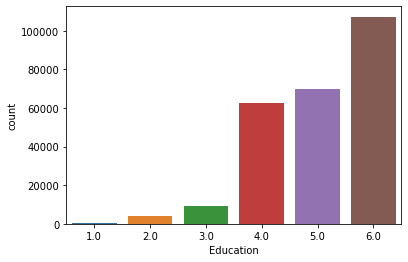

In [49]:
sns.countplot(x = 'Education', data = data)

[Text(0.5, 1.0, 'Education vs. Diabetic/non-diabetic')]

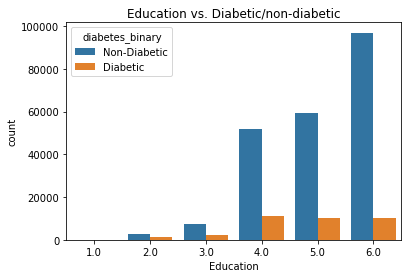

In [50]:
sns.countplot(x = 'Education', hue = 'diabetes_binary', data = data).set(title = 'Education vs. Diabetic/non-diabetic')

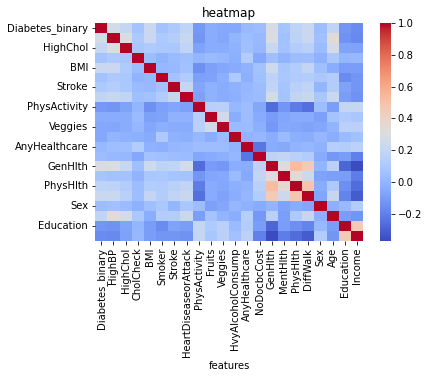

In [51]:
sns.heatmap(data.corr(), cmap='coolwarm')
plt.xlabel('features')
plt.title('heatmap')
plt.show()

In [52]:
##Variables seems to be independent from each other 
corr_matrix = data.corr()
corr_matrix[corr_matrix < 0.60] = 0
corr_matrix

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HighBP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HighChol,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CholCheck,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BMI,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Smoker,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PhysActivity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fruits,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


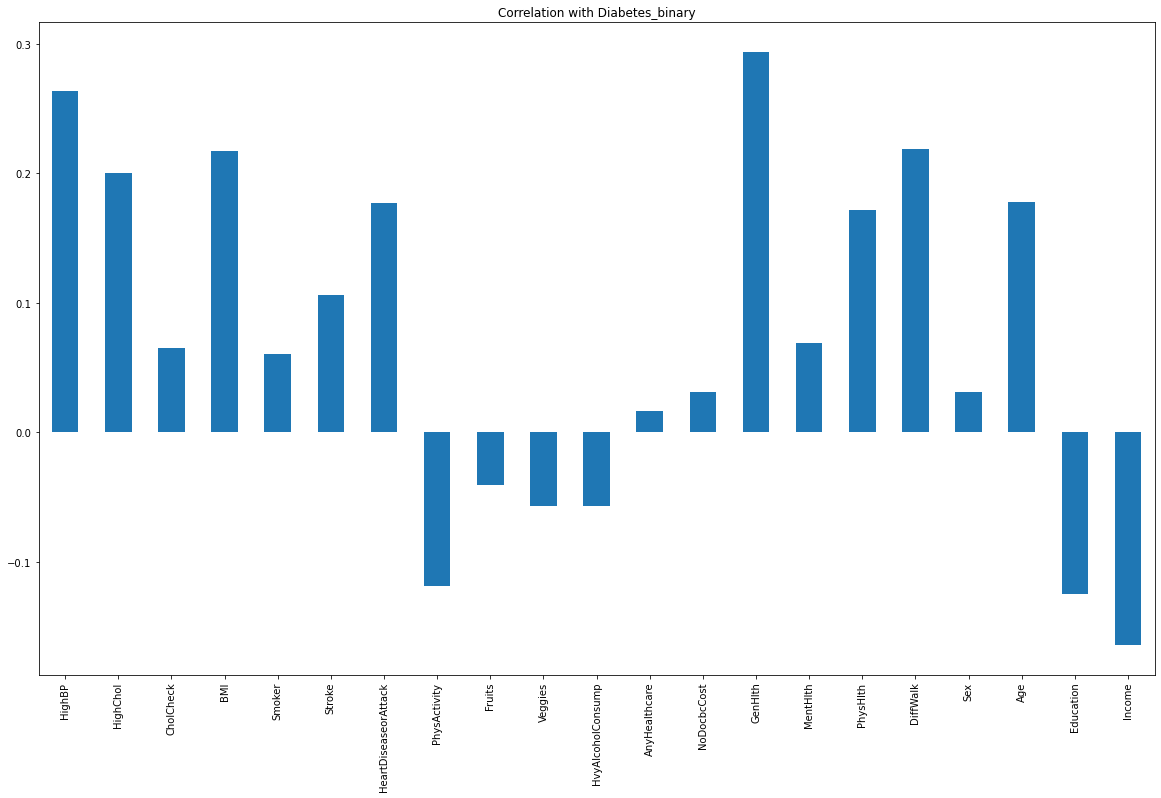

In [53]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', figsize=(20, 12)
, title="Correlation with Diabetes_binary");

[Text(0.5, 1.0, 'HighBP vs. Diabetic/non-diabetic')]

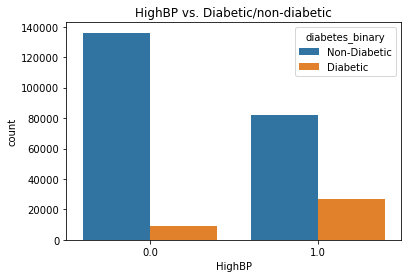

In [54]:
sns.countplot(x = 'HighBP', hue = 'diabetes_binary', data = data).set(title = 'HighBP vs. Diabetic/non-diabetic')

[Text(0.5, 1.0, 'HighChol vs. Diabetic/non-diabetic')]

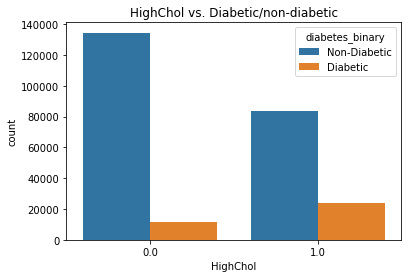

In [55]:
sns.countplot(x = 'HighChol', hue = 'diabetes_binary', data = data).set(title = 'HighChol vs. Diabetic/non-diabetic')

Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

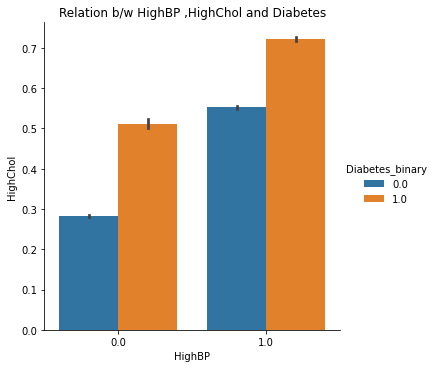

In [56]:
sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_binary" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")

[Text(0.5, 1.0, 'Smoker vs. Diabetic/non-diabetic')]

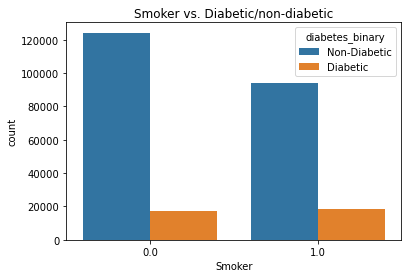

In [57]:
sns.countplot(x = 'Smoker', hue = 'diabetes_binary', data = data).set(title = 'Smoker vs. Diabetic/non-diabetic')

Text(0.5, 1.0, 'Relation b/w Smoker ,HvyAlcoholConsump and Diabetes')

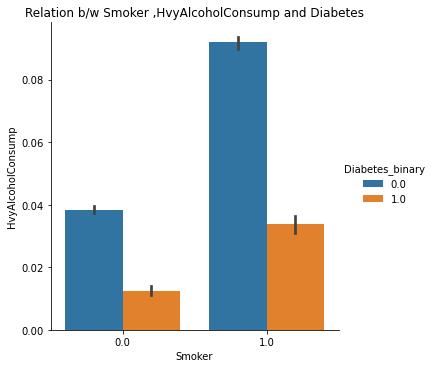

In [58]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = data , hue="Diabetes_binary"  , kind="bar"  );  
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")

### Feature I